<a href="https://colab.research.google.com/github/GergelyTuri/sleep/blob/master/notebooks/Cosine_dist_calc_single_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prototype notebook to calculate cosine distance for one dataset

* 3/10/2024

In [2]:
!git clone https://github.com/GergelyTuri/sleep.git

Cloning into 'sleep'...
remote: Enumerating objects: 809, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 809 (delta 100), reused 87 (delta 38), pack-reused 625
Receiving objects: 100% (809/809), 14.45 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (462/462), done.


In [ ]:
%cd sleep
!pip install .

In [ ]:
# %cd sleep
# !git pull

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [1]:
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import numpy as np
import pandas as pd
import seaborn as sns
from sleep.src import google_drive
from sleep.src import clustering

In [2]:
useful_data = google_drive.useful_datasets()
useful_data

,mouseID,day,sessionID,cellType,trialID,behavior_file,significantCells,imaging_planes,sima folder,spectral plot,note
0,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC1-001,GC,747,,redo,1,TSeries-07072021-0833_GC1-001_Cycle00001_Eleme...,done,S/N is not so great
1,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_GC2-003,GC,745,5ht2afl05b_1_20210707120714_745_sleep.json,redo,1,TSeries-07072021-0833_GC2-003_Cycle00001_Eleme...,done,"looks good, uploaded"
2,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC1-002,MC,740,5ht2afl05b_1_20210707110302_740_sleep.json,redo,1,TSeries-07072021-0833_MC1-002_Cycle00001_Eleme...,done,
3,5HT2afl05b_1,7_7_SD,TSeries-07072021-0833_MC2-004,MC,749,5ht2afl05b_1_20210707131056_749_sleep.json,redo,1,TSeries-07072021-0833_MC2-004_Cycle00001_Eleme...,done,nice
4,5HT2afl05b_1,7_12_SD2,TSeries-07122021-0901-002,GC_MC,,,,2,,,
5,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_GC-001,GC,762,5ht2afl05b_2_20210706101536_762_sleep.json,redo,1,TSeries-07062021-0844_GC-001_Cycle00001_Elemen...,done,S/N is not so great
6,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC-002,MC,761,5ht2afl05b_2_20210706112012_761_sleep.json,redo,1,TSeries-07062021-0844_MC-002_Cycle00001_Elemen...,done,looks good
7,5HT2afl05b_2,7_6_SD,TSeries-07062021-0844_MC2-004,MC,760,5ht2afl05b_2_20210706133302_760_sleep.json,redo,1,TSeries-07062021-0844_MC2-004_Cycle00001_Eleme...,done,"best, uploaded"
8,126031_5,11_23,TSeries-11232022-GC-GC-001,GC,874,126031_5_20221123154956_874_sleep.json,,2,TSeries-11232022-GC-GC-001.sima,,looks very good.
9,126031_5,11_23,TSeries-11232022-GC-MC-002,GC,876,126031_5_20221123163346_876_sleep.json,redo,2,TSeries-11232022-GC-MC-002.sima,,"very nice 2p, but ca signal craps off after ab..."


In [3]:
exp_path = google_drive.return_exp_path('5HT2afl05b_1', '7_12_SD2', 'TSeries-07122021-0901-002')
exp_path

'/gdrive/Shareddrives/Turi_lab/Data/Sleep/2p/Analysis/data/5HT2afl05b_1/7_12_SD2/TSeries-07122021-0901-002'

In [4]:
processed_sleep_df = pd.read_csv(join(exp_path, 'eeg', 'velo_eeg.csv'), )
processed_sleep_df

,Frames,filtered velo,score,awake,NREM,REM,other
0,0,0.000033,0,True,False,False,False
1,1,0.000231,0,True,False,False,False
2,2,0.001286,0,True,False,False,False
3,3,0.005715,0,True,False,False,False
4,4,0.020934,0,True,False,False,False
...,...,...,...,...,...,...,...
37226,37226,0.000000,0,True,False,False,False
37227,37227,0.000000,0,True,False,False,False
37228,37228,0.000000,0,True,False,False,False
37229,37229,0.000000,0,True,False,False,False


In [22]:
file_name = 'dfof_mc.csv'
dfof_data = pd.read_csv(join(exp_path, file_name))
dfof_data.set_index('roi_label', drop=True, inplace=True)

In [23]:
# Generate summary dataframes
nrem_summary = clustering.interval_length_calculator(processed_sleep_df, 'NREM', 1)
awake_summary = clustering.interval_length_calculator(processed_sleep_df, 'awake', 1)

# Filter summary dataframes
del_indices = nrem_summary.loc[nrem_summary["length"] < 600, "n"].values
summary_nrem = nrem_summary[~nrem_summary["n"].isin(del_indices)].reset_index(drop=True).copy()

del_indices = awake_summary.loc[awake_summary["length"] < 600, "n"].values
summary_awake = awake_summary[~awake_summary["n"].isin(del_indices)].reset_index(drop=True).copy()

In [24]:
summary_awake

,n,start,stop,length
0,1,0,3000,3001
1,2,3719,7120,3402
2,3,9459,11980,2522
3,4,12739,13460,722
4,5,14459,16180,1722
5,6,17119,18220,1102
6,7,20859,21460,602
7,8,22839,26320,3482
8,11,28319,29200,882
9,12,31939,33620,1682


In [25]:
awake_dfof_intervals = clustering.process_dfof_intervals(dfof_data, summary_awake)
nrem_dfof_intervals = clustering.process_dfof_intervals(dfof_data, summary_nrem)

In [26]:
nrem_dfof_intervals.shape

(43, 15560)

In [27]:
cos_dist_nrem = clustering.calculate_cosine_distance(nrem_dfof_intervals, 'nrem', normalize=True)
cos_dist_awake = clustering.calculate_cosine_distance(awake_dfof_intervals, 'awake', normalize=True)

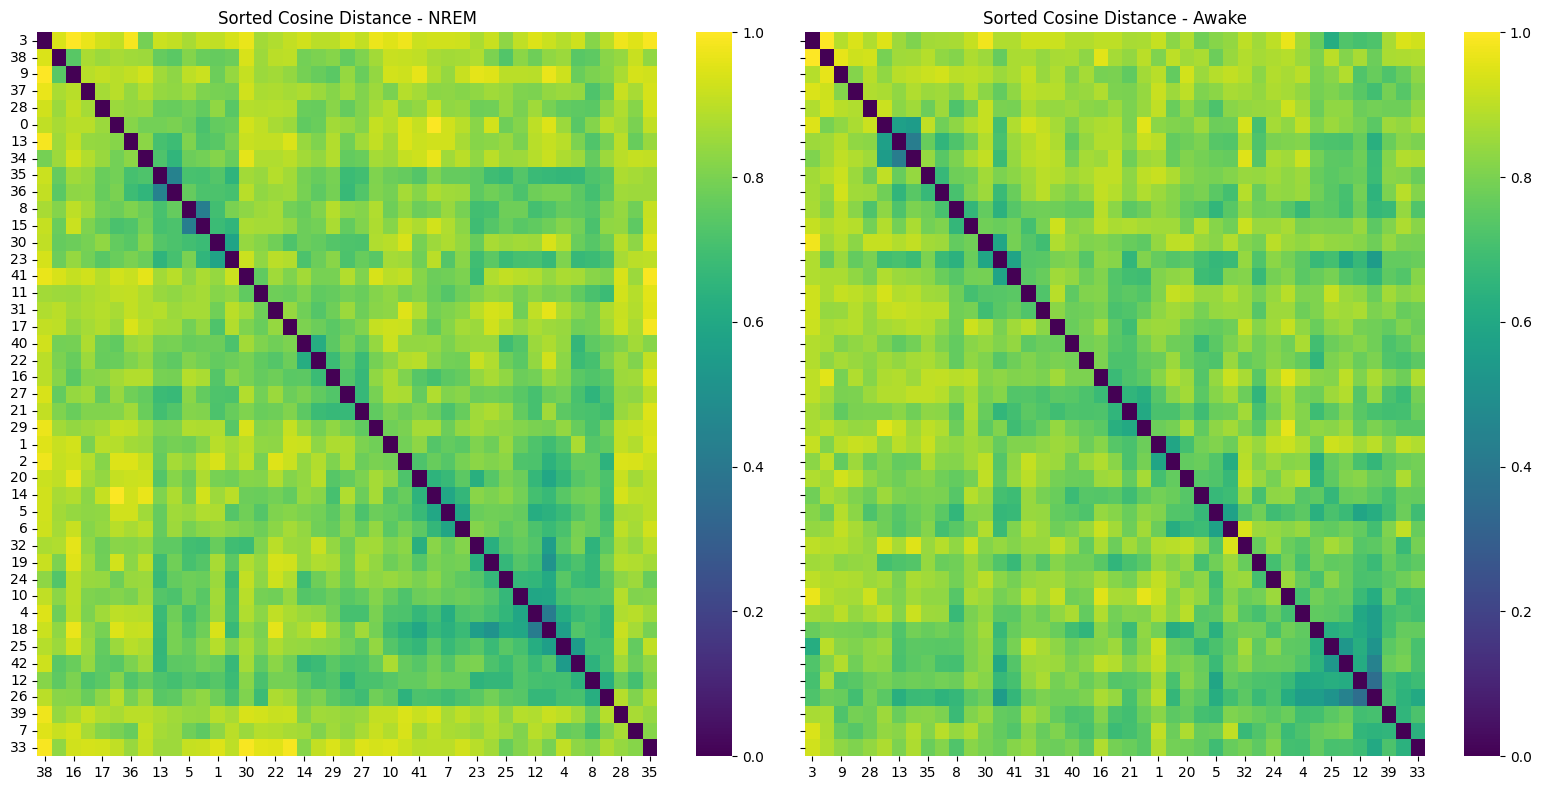

In [28]:
sorted_cos_dist_nrem = clustering.sort_distance_matrix(cos_dist_nrem)
sorted_cos_dist_awake = clustering.sort_distance_matrix(cos_dist_awake)

# Now plot the sorted matrices using seaborn's heatmap function
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

sns.heatmap(sorted_cos_dist_nrem, ax=axs[0], cmap='viridis')
axs[0].set_title('Sorted Cosine Distance - NREM')

sns.heatmap(sorted_cos_dist_awake, ax=axs[1], cmap='viridis')
axs[1].set_title('Sorted Cosine Distance - Awake')

plt.tight_layout()
plt.show()

#saving the fig
fig.savefig(join(exp_path, 'MC_sorted_cosine_dist.png'), dpi=300)

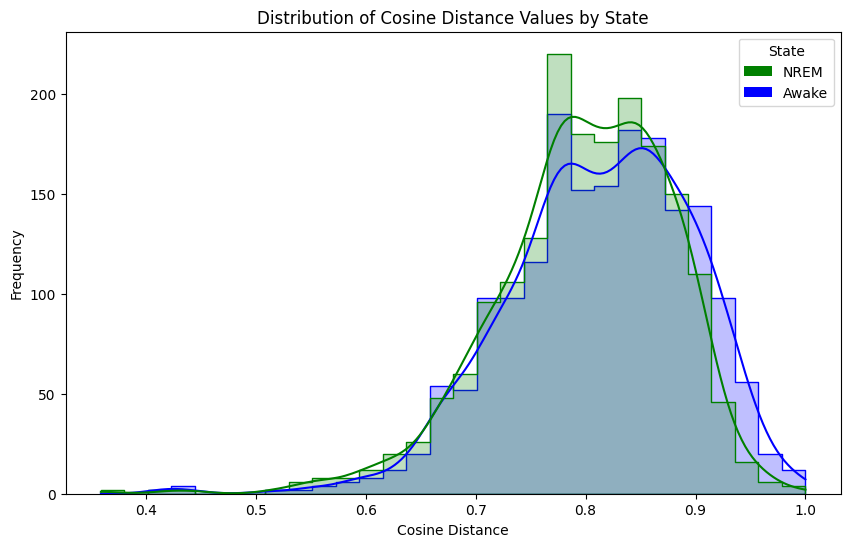

In [29]:
# Flatten the matrices and remove the diagonal (self-distance) values
distance_values_nrem = cos_dist_nrem.values.flatten()
distance_values_nrem = distance_values_nrem[~np.isnan(distance_values_nrem)]  # Remove NaN values if any
distance_values_nrem = distance_values_nrem[distance_values_nrem != 0]  # Remove self-distances

distance_values_awake = cos_dist_awake.values.flatten()
distance_values_awake = distance_values_awake[~np.isnan(distance_values_awake)]  # Remove NaN values if any
distance_values_awake = distance_values_awake[distance_values_awake != 0]  # Remove self-distances

# Combine the distance values into a single array with an associated label array
distance_values_combined = np.concatenate([distance_values_nrem, distance_values_awake])
states_combined = ['NREM'] * len(distance_values_nrem) + ['Awake'] * len(distance_values_awake)

# Create DataFrame
distances_df = pd.DataFrame({
    'Cosine Distance': distance_values_combined,
    'State': states_combined
})

distances_df['State'] = distances_df['State'].astype('category')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=distances_df,
    x='Cosine Distance',
    hue='State',
    kde=True,
    element='step',
    bins=30,
    palette=['green', 'blue']  # Explicitly set the palette here to match your desired colors
)

plt.title('Distribution of Cosine Distance Values by State')
plt.xlabel('Cosine Distance')
plt.ylabel('Frequency')

# Create custom legend handles with colors matching the plot
legend_handles = [
    Patch(facecolor='green', label='NREM'),
    Patch(facecolor='blue', label='Awake')
]

# Use the custom handles to create the legend, ensuring colors match the plot
plt.legend(handles=legend_handles, title='State')

# Saving the figure
plt.savefig(join(exp_path, 'MC_distrib_cosine_distance_values.png'), dpi=300)

plt.show()